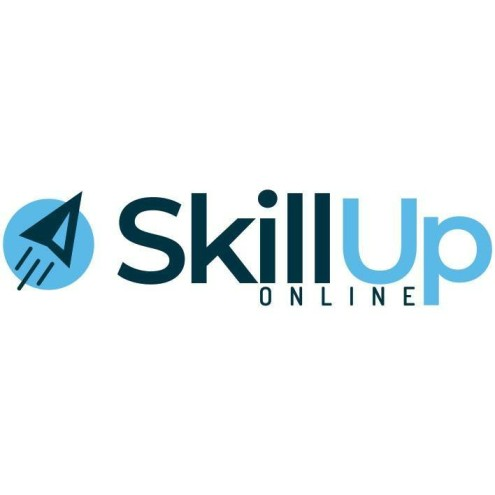

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [5]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
pwd

'C:\\Users\\Usuario\\Documents\\CURSOS CASA\\IA_IBM\\Proyecto final'

In [7]:
cd DATASET

C:\Users\Usuario\Documents\CURSOS CASA\IA_IBM\Proyecto final\DATASET


In [8]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: 3A6D-D418

 Directorio de C:\Users\Usuario\Documents\CURSOS CASA\IA_IBM\Proyecto final\DATASET

19/08/2024  11:00    <DIR>          .
19/08/2024  11:00    <DIR>          ..
18/08/2024  20:11        69.155.672 archive (14).zip
20/09/2019  00:04       150.828.752 creditcard.csv
19/08/2024  11:00         2.353.759 modelo_fraude.pkl
               3 archivos    222.338.183 bytes
               2 dirs  473.826.861.056 bytes libres


### Importa y organiza el dataset

In [9]:
# Organizar los datos en un dataframe

# Cargar el archivo CSV en un dataframe
data = pd.read_csv('creditcard.csv')

# Mostrar las primeras 10 filas del dataframe
data.head(10)




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [32]:
# Extract information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
# Verificar la cantidad de valores nulos en cada columna del dataframe
nulos_por_columna = data.isnull().sum()

# Mostrar los resultados
nulos_por_columna

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [21]:
# Verificar la cantidad de filas duplicadas en el dataframe
filas_duplicadas = data.duplicated().sum()

# Mostrar los resultados
filas_duplicadas



1081

c. outliers

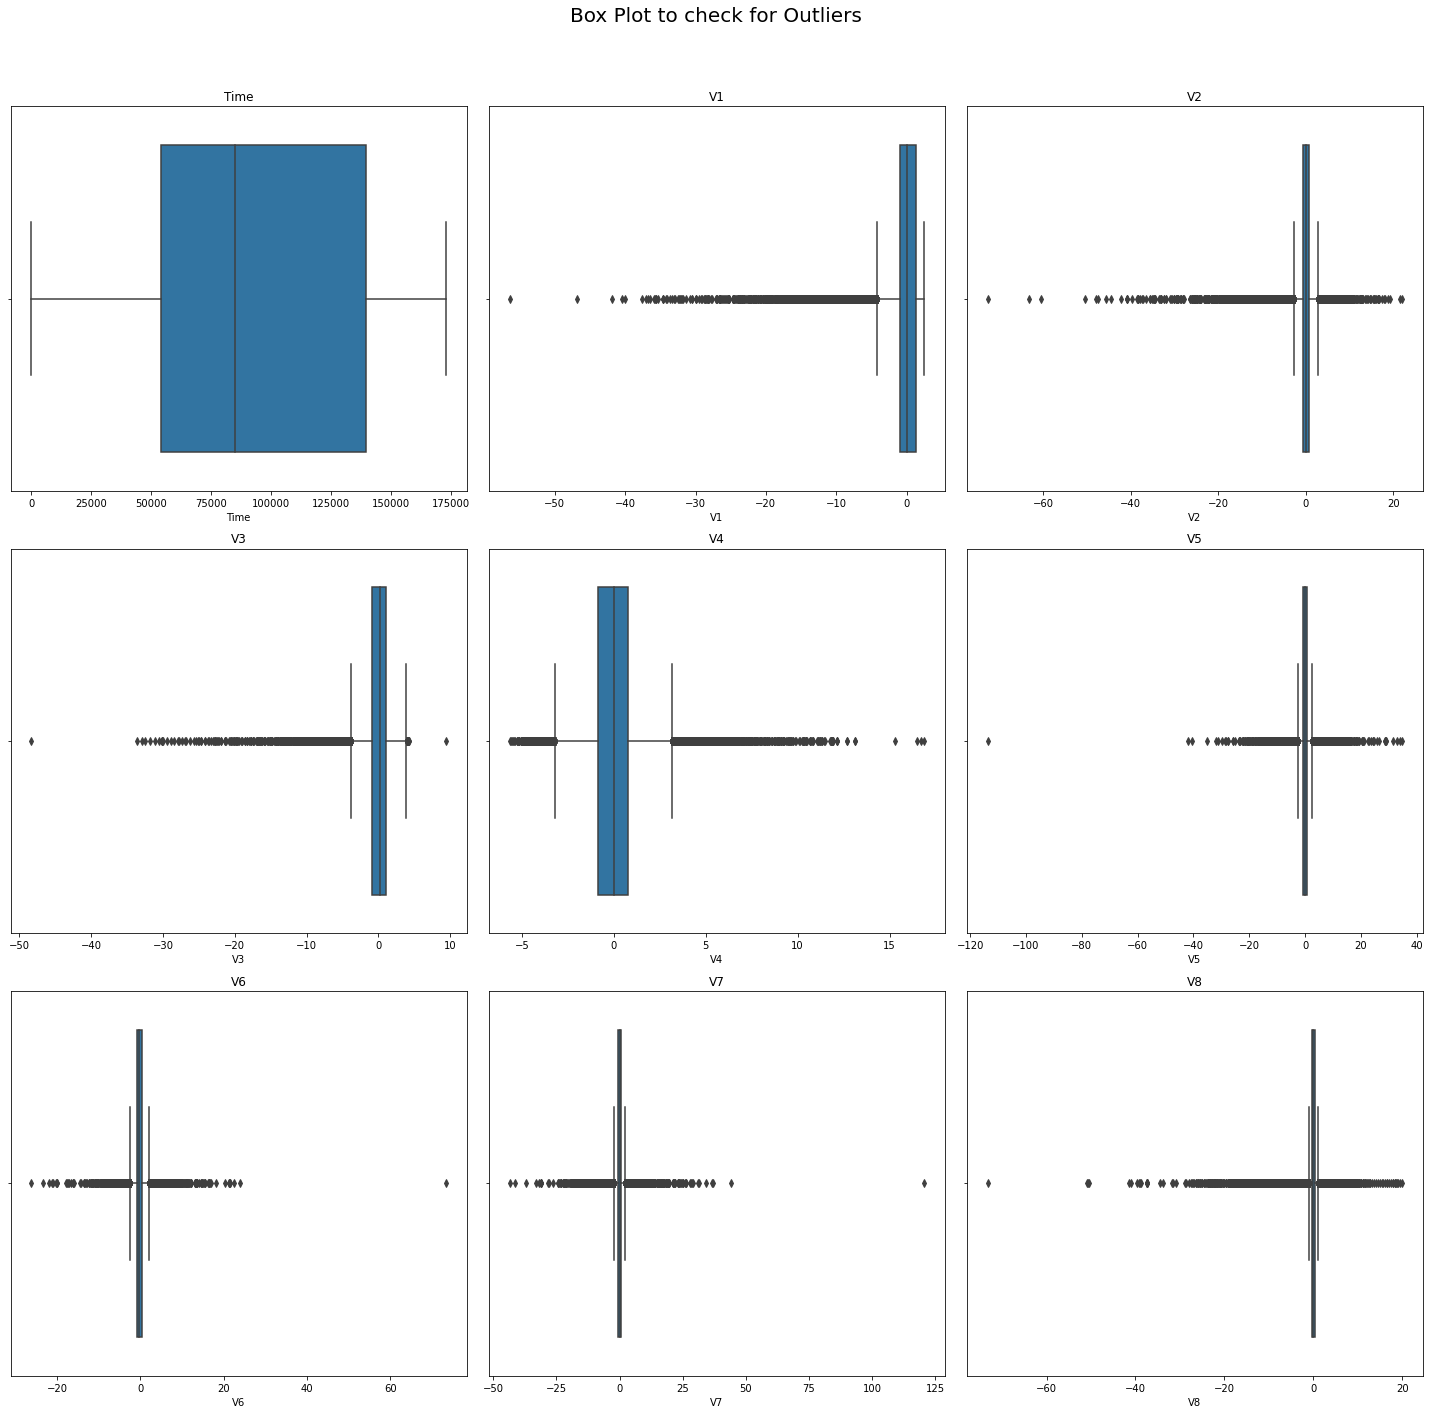

In [10]:
# Verificar existencia de outliers 

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()  # Flatten the array of axes to make indexing easier
fig.suptitle('Box Plot to check for Outliers', fontsize=20)

# Examinar las primeras 9 columnas del DataFrame y cree un diagrama de caja para cada una.
for i, column in enumerate(data.columns[:9]):
    sns.boxplot(data=data, x=column, ax=ax[i])
    ax[i].set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste el diseño para que se ajuste al título y evitar la superposición
plt.show()

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [19]:
# Contar el número total de transacciones
total_transacciones = len(data)

# Contar el número de transacciones fraudulentas (donde 'Class' es igual a 1)
transacciones_fraudulentas = data[data['Class'] == 1].shape[0]

# Calcular el porcentaje de transacciones fraudulentas
porcentaje_fraude = (transacciones_fraudulentas / total_transacciones) * 100

# Mostrar el porcentaje de transacciones fraudulentas
porcentaje_fraude



0.1727485630620034

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [20]:
# Calcula el importe medio de las transacciones fraudulentas

# Filtrar el dataset para obtener solo las transacciones fraudulentas (donde 'Class' es igual a 1)
transacciones_fraudulentas = data[data['Class'] == 1]

# Calcular el importe medio de la columna 'Amount' en las transacciones fraudulentas
importe_medio_fraude = transacciones_fraudulentas['Amount'].mean()

# Mostrar el importye el importe medio de las transacciones fraudulentas
importe_medio_fraude

122.21132113821133

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

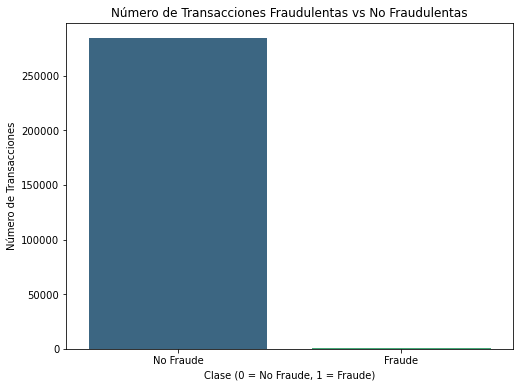

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de transacciones fraudulentas y no fraudulentas
conteo_clases = data['Class'].value_counts()

# Crear un gráfico de barras para mostrar la cantidad de transacciones fraudulentas y no fraudulentas
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette='viridis')

# Añadir etiquetas y título al gráfico
plt.xlabel('Clase (0 = No Fraude, 1 = Fraude)')
plt.ylabel('Número de Transacciones')
plt.title('Número de Transacciones Fraudulentas vs No Fraudulentas')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])

# Mostrar el gráfico
plt.show()



<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


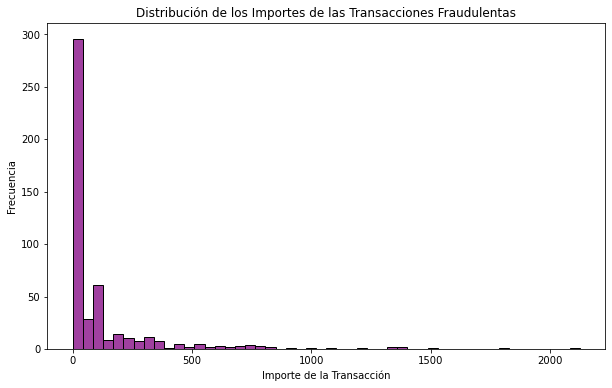

In [22]:

# Filtrar el dataset para obtener solo las transacciones fraudulentas (donde 'Class' es igual a 1)
transacciones_fraudulentas = data[data['Class'] == 1]

# Crear un histograma para visualizar la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(10, 6))
sns.histplot(transacciones_fraudulentas['Amount'], bins=50, kde=False, color='purple')

# Añadir etiquetas y título al gráfico
plt.xlabel('Importe de la Transacción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Importes de las Transacciones Fraudulentas')

# Mostrar el gráfico de la distribución de los importes de las transacciones fraudulentas
plt.show()



<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [23]:
# Separa los datos de entrenamiento y evaluación

from sklearn.model_selection import train_test_split

# Crear el dataframe X con todas las columnas excepto 'Class'
X = data.drop(columns=['Class'])

# Crear la serie y con la columna 'Class'
y = data['Class']

# Separar los datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos resultantes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((227845, 30), (56962, 30), (227845,), (56962,))

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Crear una instancia del RandomForestClassifier con los hiperparámetros especificados
modelo = RandomForestClassifier(max_depth=150, random_state=42)

In [25]:
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)


RandomForestClassifier(max_depth=150, random_state=42)

In [26]:
# Hacer predicciones sobre los datos de evaluación
y_pred = modelo.predict(X_test)


In [28]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
# Evaluar el rendimiento del modelo utilizando classification_report
reporte_clasificacion = classification_report(y_test, y_pred)
print("Reporte de clasificación:\n", reporte_clasificacion)



Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
# Generar el reporte de clasificaicón como un dataframe

from sklearn.metrics import classification_report
import pandas as pd

# Generar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_pred, output_dict=True)

# Convertir el reporte a un DataFrame
df_reporte = pd.DataFrame(reporte_clasificacion).transpose()

# Mostrar el DataFrame
print(df_reporte)


              precision    recall  f1-score       support
0              0.999596  0.999965  0.999780  56864.000000
1              0.974026  0.765306  0.857143     98.000000
accuracy       0.999561  0.999561  0.999561      0.999561
macro avg      0.986811  0.882635  0.928462  56962.000000
weighted avg   0.999552  0.999561  0.999535  56962.000000


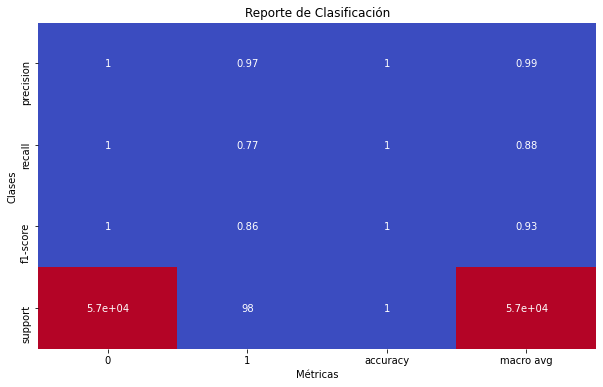

In [38]:
# Visualizar el reporte de clasificación 

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un mapa de calor (heatmap) para visualizar las métricas
sns.heatmap(df_reporte.iloc[:-1, :].T, annot=True, cmap='coolwarm', cbar=False)

# Añadir títulos y etiquetas
plt.title('Reporte de Clasificación')
plt.xlabel('Métricas')
plt.ylabel('Clases')

# Mostrar el gráfico
plt.show()

In [32]:
# Calcular y mostrar la exactitud del modelo en los datos de evaluación
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo: {:.2f}%".format(exactitud * 100))

Exactitud del modelo: 99.96%


In [35]:
y_pred


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#Visualizar la Matrix de confusión 

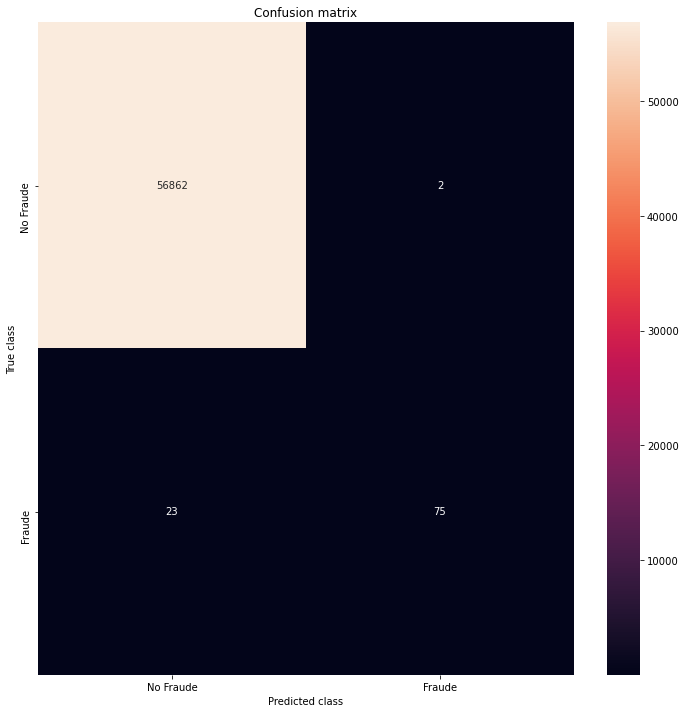

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


#visulalizing the confusion matrix
LABELS = ['No Fraude', 'Fraude'] 
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12)) 
sns.heatmap(matriz_confusion, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [35]:
# Visualizar árbol de decisión 

In [54]:
!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz 
from IPython.display import Image
from sklearn.tree import plot_tree

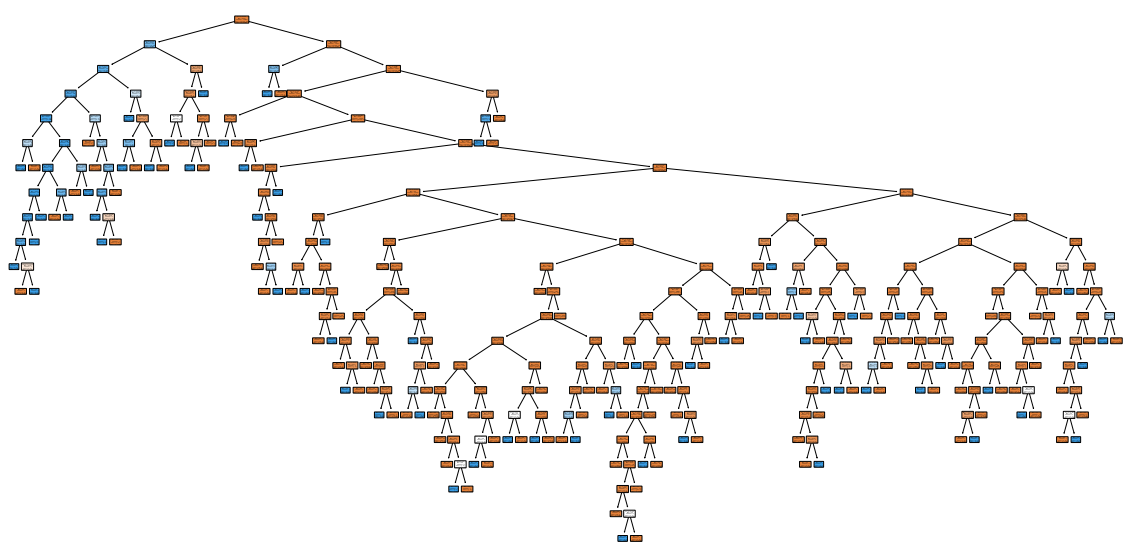

In [61]:
# Extraer un árbol individual del RandomForestClassifier
# Aquí seleccionamos el primer árbol del bosque (estimador)
arbol = modelo.estimators_[0]

# Visualizar el árbol con plot_tree
plt.figure(figsize=(20, 10))
plot_tree(arbol, filled=True, feature_names=X_train.columns, class_names=["No Fraude", "Fraude"], rounded=True)
plt.show() 

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>